In [16]:
# read data

from mnist import MNIST
import numpy as np
mndata = MNIST("/Users/jigyayadav/Desktop/Codes/neuralnets253/HW1")
mndata.gz = True
images, labels = mndata.load_training() #Images is a list of 60000 images of 784 dimensions, Labels is a list of 60000 ints
imagesTest, labelsTest = mndata.load_testing()

images = np.array(images)
labels = np.array(labels)
imagesTest = np.array(imagesTest)
labelsTest = np.array(labelsTest)
images = np.insert(images, 0, 1, axis=1)
imagesTest = np.insert(imagesTest, 0, 1, axis=1)

In [17]:
images_train_all = images[:20000]
images_test_all = imagesTest[-2000:]
labels_train_all = labels[:20000]
labels_test_all = labelsTest[-2000:]

images_train = []
images_test = []
labels_train = []
labels_test = []

for i in range(len(labels_train_all)):
    if (labels_train_all[i] == 2):
        images_train.append(images_train_all[i])
        labels_train.append(1)
    if (labels_train_all[i] == 3):
        images_train.append(images_train_all[i])
        labels_train.append(0)
        
for i in range(len(labels_test_all)):
    if (labels_test_all[i] == 2):
        images_test.append(images_test_all[i])
        labels_test.append(1)
    if (labels_test_all[i] == 3):
        images_test.append(images_test_all[i])
        labels_test.append(0)

numFeatures = len(images[0, :])
trainingSize = len(images_train)

images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)

In [18]:
images_train = images_train*(1/255)
images_test = images_test*(1/255)

In [4]:
images_train.shape

(4005, 785)

In [20]:
from sklearn.model_selection import train_test_split
images_train, images_validation, labels_train, labels_validation = train_test_split(images_train, labels_train, test_size=0.10, random_state=42)

In [21]:
# Helper functions

import math
from sklearn.metrics import accuracy_score

numIterations = 10000

def predictLabel(a):
    if (a >= 0.5):
        return 1
    return 0

def predictionAccuracy(x, weights, t):
    predictedOutput = predictY(x, weights)
    for i in range(len(predictedOutput)):
        predictedOutput[i] = predictLabel(predictedOutput[i])
    return accuracy_score(t, predictedOutput)

def errorFunction(weights, x, t, l2, reg):
    numExamples = len(x)
#     print("Number examples = ", numExamples)
    predictedOutput = predictY(x, weights)
    error = 0
    examplesCounted = 0
    for i in range(numExamples):
        if (predictedOutput[i] < 1 and predictedOutput[i] > 0):
            error += t[i]*math.log(predictedOutput[i])+(1-t[i])*math.log(1-predictedOutput[i])
            examplesCounted += 1
    error = -1*(error/examplesCounted)
    if (l2):
        squaredWeights = np.square(weights)
        error += reg*np.sum(squaredWeights)
    else:
        absWeights = np.abs(weights)
        error += reg*np.sum(absWeights)
    return error

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def predictY(x, weights):
    predictedOutput = np.dot(x, weights)
    for i in range(len(predictedOutput)):
        predictedOutput[i] = sigmoid(predictedOutput[i])
    return predictedOutput

def updateWeights(weights, x, t, learningRate, regularization, l2):
    predicted = predictY(x, weights)
    diffPredictedActual = predicted-t
    differentiation = (diffPredictedActual.T).dot(x)
    differentiation = differentiation*(1/len(x))
    if (l2 == True):
        differentiation += 2*regularization*weights
    else:
        diffRegularizer = np.zeros(len(weights))
        for i in range(len(weights)):
            if weights[i] == 0:
                diffRegularizer[i] = 0
            elif weights[i] > 0:
                diffRegularizer[i] = 1
            else:
                diffRegularizer[i] = -1
        differentiation += regularization*(diffRegularizer)
#     print("Learning rate = ", learningRate)
    newWeights = (weights-learningRate*differentiation)
    return newWeights

In [105]:
maxValidationClassificationAcc = float("-inf")
bestLearningRate = 0.001
bestAnnealingParam = 10000

for testLam in [0.001, 0.00001, 0.0001, 0.0003]:
    for annealingParameter in [5000, 10000]:
        print("Learning rate = ", testLam)
        learningRate = testLam
        weights = np.random.normal(0, 1, numFeatures)
        weightsWhichMinimizeError = np.zeros(numFeatures)
        minErrorFunction = float('inf')
        prevValidationError = 0.0
        cnt = 0
        stoppingIteration = 1
        iterationMinWeight = 0
        for i in range(numIterations):
    #         print("Iteration = ", i)
            learningRate = testLam/(1+i/annealingParameter)
            weights = updateWeights(weights, images_train, labels_train)
    #         trainAccuracy = predictionAccuracy(images_train, weights, labels_train)
    #         validationAccuracy = predictionAccuracy(images_validation, weights, labels_v)
            currValidationError = errorFunction(weights, images_validation, labels_validation)
    #         print("Current validation error = ", currValidationError)
            if (currValidationError < minErrorFunction):
                weightsWhichMinimizeError = weights
                minErrorFunction = currValidationError
                iterationMinWeight = i
            if (currValidationError > prevValidationError):
                cnt += 1
                if (cnt >= 3 and i > 50):
                    stoppingIteration = i
                    break
            else:
                cnt = 0
            prevValidationError = currValidationError

        print("Iteration of min weights = ", iterationMinWeight)
        validationAccuracyFinal = predictionAccuracy(images_validation, weightsWhichMinimizeError, labels_validation)
        print("Final validation classification accuracy = ", validationAccuracyFinal)
        if (validationAccuracyFinal > maxValidationClassificationAcc):
            maxValidationClassificationAcc = validationAccuracyFinal
            bestLearningRate = testLam
            bestAnnealingParam = annealingParameter


Learning rate =  0.001
Iteration of min weights =  1500
Final validation classification accuracy =  0.9625935162094763
Learning rate =  0.001
Iteration of min weights =  770
Final validation classification accuracy =  0.9650872817955112
Learning rate =  1e-05
Iteration of min weights =  9999
Final validation classification accuracy =  0.9576059850374065
Learning rate =  1e-05
Iteration of min weights =  9999
Final validation classification accuracy =  0.9451371571072319
Learning rate =  0.0001
Iteration of min weights =  1298
Final validation classification accuracy =  0.9600997506234414
Learning rate =  0.0001
Iteration of min weights =  9999
Final validation classification accuracy =  0.9650872817955112
Learning rate =  0.0003
Iteration of min weights =  2653
Final validation classification accuracy =  0.972568578553616
Learning rate =  0.0003
Iteration of min weights =  2204
Final validation classification accuracy =  0.9775561097256857


In [106]:
print("Best learning rate = ", bestLearningRate)
print("Best annealing parameter = ", bestAnnealingParam)

Best learning rate =  0.0003
Best annealing parameter =  10000


In [25]:
import matplotlib.pyplot as plt

def gradientDescent(x, t, testLam, regularization, annealingParameter, l2):
#     testLam = 0.0003
#     annealingParameter = 10000
    images_train = x[0]
    images_validation = x[1]
    images_test = x[2]
    labels_train = t[0]
    labels_validation = t[1]
    labels_test = t[2]
    print("Shapes:")
    print(images_train.shape)
    print(images_validation.shape)
    print(images_test.shape)
    print(labels_train.shape)
    print(labels_validation.shape)
    print(labels_test.shape)
    
#     weights = np.random.normal(0, 1, numFeatures)
    weights = np.zeros(numFeatures)
    weightsMinError = np.zeros(numFeatures)
    minErrorFunction = float('inf')
    prevValidationError = 0.0
    cnt = 0
    stoppingIteration = 1
    iterationMinWeight = 0
    arrTrainingError = []
    arrValidationError = []
    arrTestError = []
    arrTrainClassificationAccuracy = []
    arrValidationClassificationAccuracy = []
    arrTestClassificationAccuracy = []

    for i in range(5000):
        currLearningRate = testLam/(1+(i/annealingParameter))
        weights = updateWeights(weights, images_train, labels_train, currLearningRate, regularization, l2)
        trainAccuracy = predictionAccuracy(images_train, weights, labels_train)
        validationAccuracy = predictionAccuracy(images_validation, weights, labels_validation)
        testAccuracy = predictionAccuracy(images_test, weights, labels_test)
        currValidationError = errorFunction(weights, images_validation, labels_validation, l2, regularization)
        currTestError = errorFunction(weights, images_test, labels_test, l2, regularization)
        currTrainError = errorFunction(weights, images_train, labels_train, l2, regularization)
        arrTrainingError.append(currTrainError)
        arrValidationError.append(currValidationError)
        arrTestError.append(currTestError)
        arrTrainClassificationAccuracy.append(trainAccuracy)
        arrValidationClassificationAccuracy.append(validationAccuracy)
        arrTestClassificationAccuracy.append(testAccuracy)
        if (i%100 == 0):
            print("Iteration = ", i)
            print("Current validation error = ", currValidationError)
        if (currValidationError < minErrorFunction):
            weightsMinError = weights
            minErrorFunction = currValidationError
            iterationMinWeight = i
        if (currValidationError > prevValidationError):
            cnt += 1
            if (cnt >= 3 and i > 50):
                stoppingIteration = i
                break
        else:
            cnt = 0
        prevValidationError = currValidationError

    print("Iteration of min weights = ", iterationMinWeight)
    print("Stopping iteration = ", stoppingIteration)
    
    testAccuracyFinal = predictionAccuracy(images_test, weightsMinError, labels_test)
    validationAccuracyFinal = predictionAccuracy(images_validation, weightsMinError, labels_validation)
    trainAccuracyFinal = predictionAccuracy(images_train, weightsMinError, labels_train)
    print("Final train classification accuracy = ", trainAccuracyFinal)
    print("Final validation classification accuracy = ", validationAccuracyFinal)
    print("Final test classification accuracy = ", testAccuracyFinal)

    plt.figure(1)
    plt.subplot(211)
    plt.plot(arrTrainingError, label='Train', color='blue')
    plt.plot(arrValidationError, label='Validation', color='green')
    plt.plot(arrTestError, label='Test', color='red')
    plt.ylabel('Error')
    plt.xlabel('Iterations')

    plt.subplot(212)
    plt.plot(arrTrainClassificationAccuracy, label='Train', color='blue')
    plt.plot(arrValidationClassificationAccuracy, label='Validation', color='green')
    plt.plot(arrTestClassificationAccuracy, label='Test', color='red')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.show()


In [ ]:
x = [images_train, images_validation, images_test]
t = [labels_train, labels_validation, labels_test]

for reg in [0.1, 0.01, 0.001]:
    for learning_rate in [0.001, 0.0001, 0.0003]:
        print("Regularization = ", reg, "Learning Rate = ", learning_rate)
        gradientDescent(x, t, learning_rate, reg, 10000, False)

Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration =  0
Current validation error =  2.771508952634023
Iteration =  100
Current validation error =  2.448804571189717
Iteration =  200
Current validation error =  2.2119145044245685
Iteration =  300
Current validation error =  2.037273918208389
Iteration =  400
Current validation error =  1.905384179171651
Iteration =  500
Current validation error =  1.8026887823342739
Iteration =  600
Current validation error =  1.7202616249404676
Iteration =  700
Current validation error =  1.6520905342223204
Iteration =  800
Current validation error =  1.594100897083133
Iteration =  900
Current validation error =  1.5435473533445674
Iteration =  1000
Current validation error =  1.4985704363527375
Iteration =  1100
Current validation error =  1.4578855019553205
Iteration =  1200
Current validation error =  1.4205864845205476
Iteration =  1300
Current validation error =  1.3860248038350418
Iteration =  1400
Current validation error 

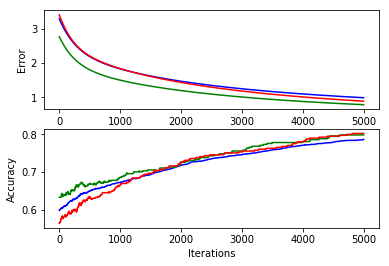

In [14]:
# No regularisation
x = [images_train, images_validation, images_test]
t = [labels_train, labels_validation, labels_test]
gradientDescent(x, t, 0.001, 0.01, 10000, True)

Regularization =  0.1 Learning Rate =  0.001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  272
Stopping iteration =  277
Final train classification accuracy =  0.9797447280799112
Final validation classification accuracy =  0.9750623441396509
Final test classification accuracy =  0.9828850855745721


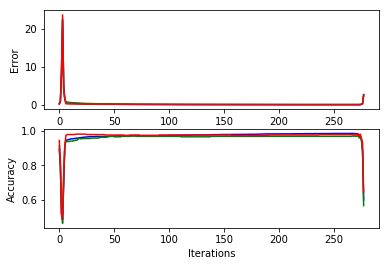

Regularization =  0.1 Learning Rate =  0.0001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  1027
Stopping iteration =  1030
Final train classification accuracy =  0.9794672586015538
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9779951100244498


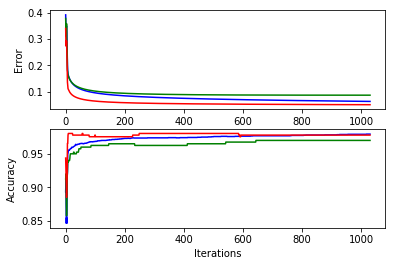

Regularization =  0.1 Learning Rate =  0.0003   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  389
Stopping iteration =  392
Final train classification accuracy =  0.980299667036626
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9755501222493888


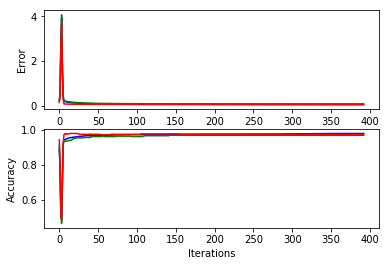

Regularization =  0.01 Learning Rate =  0.001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  290
Stopping iteration =  297
Final train classification accuracy =  0.982519422863485
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9828850855745721


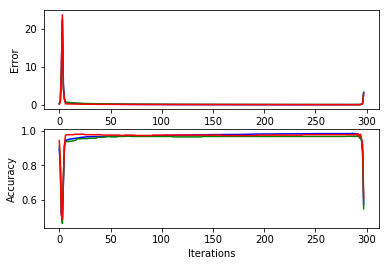

Regularization =  0.01 Learning Rate =  0.0001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  994
Stopping iteration =  997
Final train classification accuracy =  0.9791897891231964
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9779951100244498


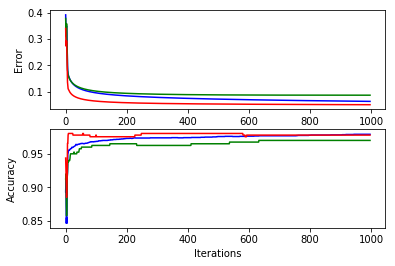

Regularization =  0.01 Learning Rate =  0.0003   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  375
Stopping iteration =  378
Final train classification accuracy =  0.9800221975582686
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9755501222493888


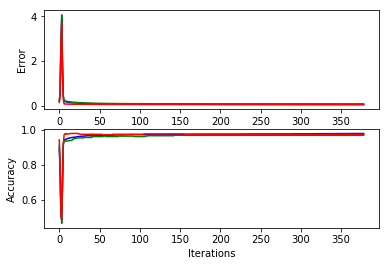

Regularization =  0.001 Learning Rate =  0.001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  291
Stopping iteration =  296
Final train classification accuracy =  0.9808546059933407
Final validation classification accuracy =  0.9750623441396509
Final test classification accuracy =  0.9828850855745721


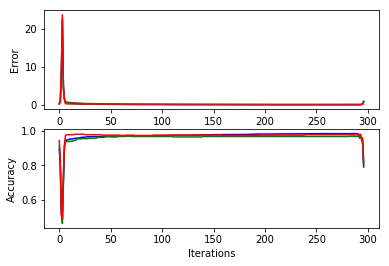

Regularization =  0.001 Learning Rate =  0.0001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  991
Stopping iteration =  994
Final train classification accuracy =  0.9791897891231964
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9779951100244498


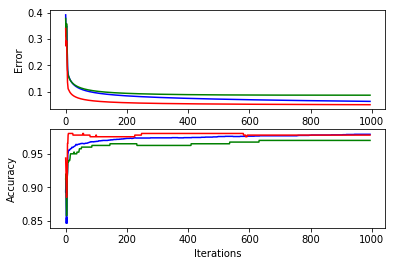

Regularization =  0.001 Learning Rate =  0.0003   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  373
Stopping iteration =  376
Final train classification accuracy =  0.9800221975582686
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9755501222493888


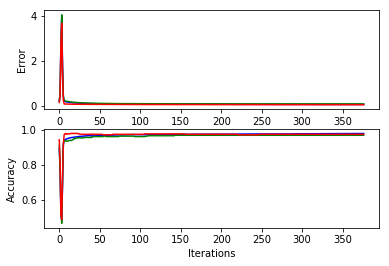

Regularization =  0.1 Learning Rate =  0.001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  211
Stopping iteration =  220
Final train classification accuracy =  0.9786348501664817
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.9779951100244498


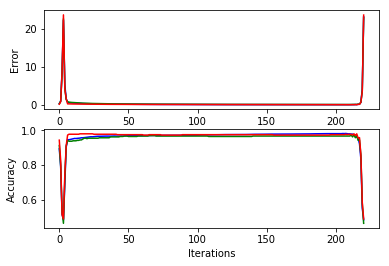

Regularization =  0.1 Learning Rate =  0.0001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  1070
Stopping iteration =  1075
Final train classification accuracy =  0.9794672586015538
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9779951100244498


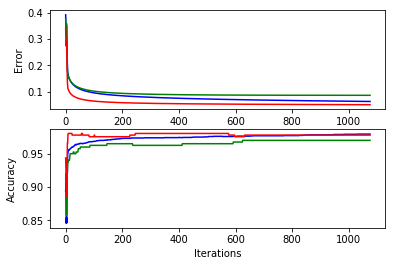

Regularization =  0.1 Learning Rate =  0.0003   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  398
Stopping iteration =  401
Final train classification accuracy =  0.980299667036626
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9755501222493888


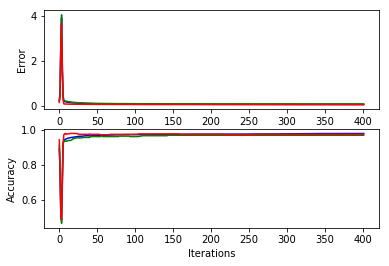

Regularization =  0.01 Learning Rate =  0.001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  226
Stopping iteration =  235
Final train classification accuracy =  0.9791897891231964
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.980440097799511


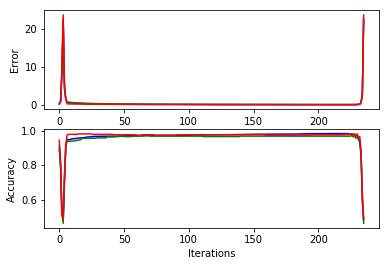

Regularization =  0.01 Learning Rate =  0.0001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  997
Stopping iteration =  1000
Final train classification accuracy =  0.9791897891231964
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9779951100244498


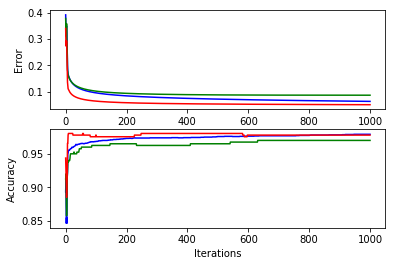

Regularization =  0.01 Learning Rate =  0.0003   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  377
Stopping iteration =  380
Final train classification accuracy =  0.980299667036626
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9755501222493888


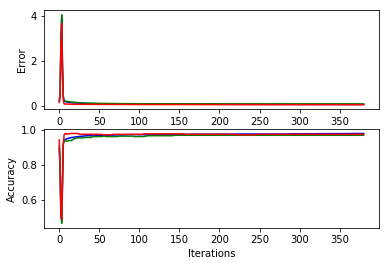

Regularization =  0.001 Learning Rate =  0.001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  233
Stopping iteration =  240
Final train classification accuracy =  0.9797447280799112
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.980440097799511


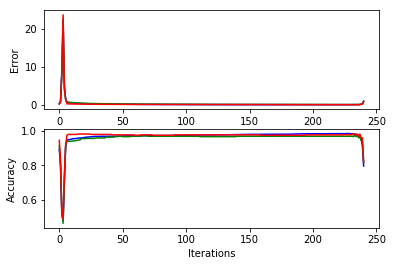

Regularization =  0.001 Learning Rate =  0.0001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  991
Stopping iteration =  994
Final train classification accuracy =  0.9791897891231964
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9779951100244498


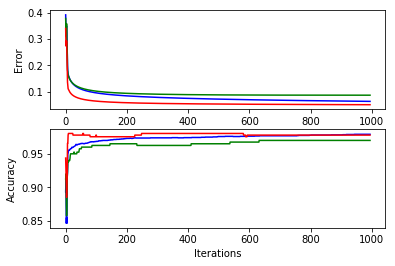

Regularization =  0.001 Learning Rate =  0.0003   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  373
Stopping iteration =  376
Final train classification accuracy =  0.9800221975582686
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9755501222493888


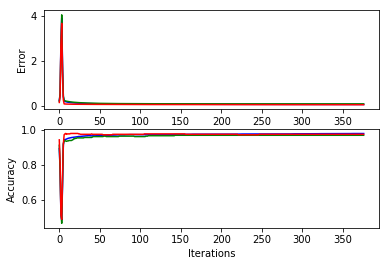

In [70]:
x = [images_train, images_validation, images_test]
t = [labels_train, labels_validation, labels_test]

for reg in [0.1, 0.01, 0.001]:
    for learning_rate in [0.001, 0.0001, 0.0003]:
        print("Regularization = ", reg, "Learning Rate = ", learning_rate, "  with L2 = True")
        gradientDescent(x, t, learning_rate, reg, 10000, True)
    
for reg in [0.1, 0.01, 0.001]:
    for learning_rate in [0.001, 0.0001, 0.0003]:
        print("Regularization = ", reg, "Learning Rate = ", learning_rate, "  with L2 = False")
        gradientDescent(x, t, learning_rate, reg, 10000, False)

Regularization =  0.1 Learning Rate =  0.001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  365
Stopping iteration =  374
Final train classification accuracy =  0.9783573806881243
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.980440097799511


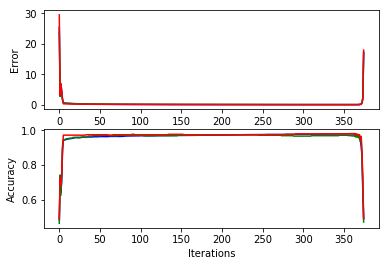

Regularization =  0.1 Learning Rate =  0.0001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  2997
Stopping iteration =  3000
Final train classification accuracy =  0.9783573806881243
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.980440097799511


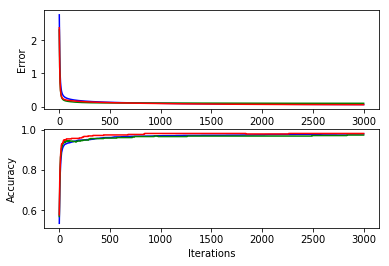

Regularization =  0.1 Learning Rate =  0.0003   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  1567
Stopping iteration =  1570
Final train classification accuracy =  0.9827968923418424
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.9755501222493888


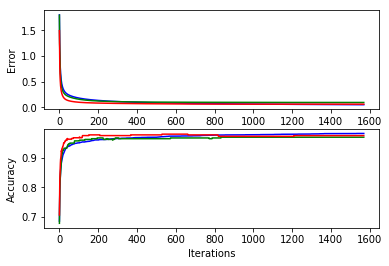

Regularization =  0.01 Learning Rate =  0.001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  774
Stopping iteration =  1335
Final train classification accuracy =  0.9864039955604883
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.9828850855745721


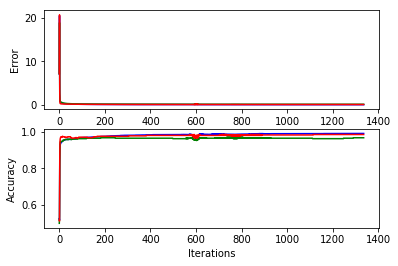

Regularization =  0.01 Learning Rate =  0.0001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  4440
Stopping iteration =  4443
Final train classification accuracy =  0.9797447280799112
Final validation classification accuracy =  0.9625935162094763
Final test classification accuracy =  0.9755501222493888


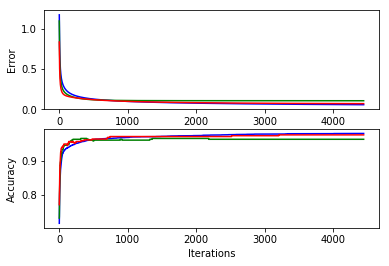

Regularization =  0.01 Learning Rate =  0.0003   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  2524
Stopping iteration =  2527
Final train classification accuracy =  0.9864039955604883
Final validation classification accuracy =  0.9675810473815462
Final test classification accuracy =  0.9731051344743277


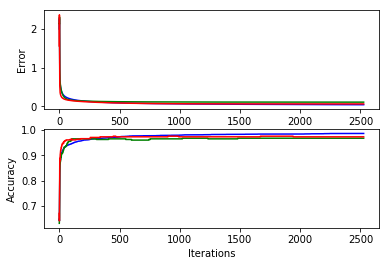

Regularization =  0.001 Learning Rate =  0.001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  776
Stopping iteration =  987
Final train classification accuracy =  0.9869589345172031
Final validation classification accuracy =  0.970074812967581
Final test classification accuracy =  0.980440097799511


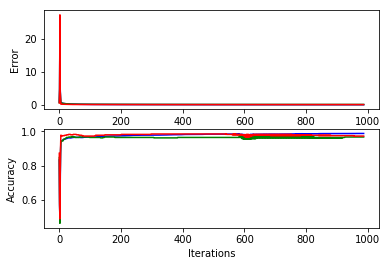

Regularization =  0.001 Learning Rate =  0.0001   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  4444
Stopping iteration =  4447
Final train classification accuracy =  0.9822419533851277
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.9755501222493888


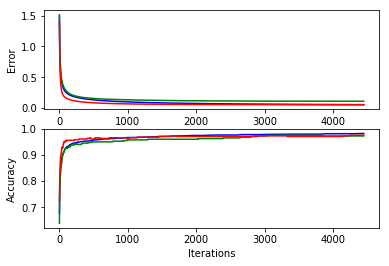

Regularization =  0.001 Learning Rate =  0.0003   with L2 = True
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  2349
Stopping iteration =  2352
Final train classification accuracy =  0.9858490566037735
Final validation classification accuracy =  0.9650872817955112
Final test classification accuracy =  0.9828850855745721


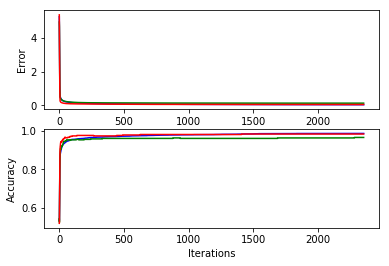

Regularization =  0.1 Learning Rate =  0.001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  639
Stopping iteration =  1250
Final train classification accuracy =  0.980299667036626
Final validation classification accuracy =  0.9800498753117207
Final test classification accuracy =  0.9828850855745721


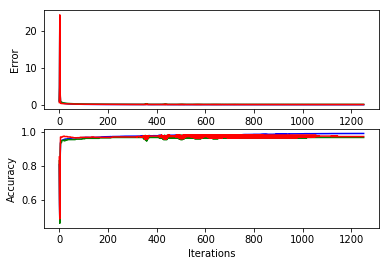

Regularization =  0.1 Learning Rate =  0.0001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  4999
Stopping iteration =  1
Final train classification accuracy =  0.9844617092119867
Final validation classification accuracy =  0.972568578553616
Final test classification accuracy =  0.9706601466992665


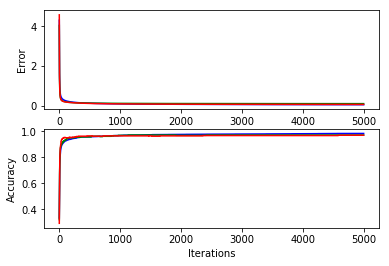

Regularization =  0.1 Learning Rate =  0.0003   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  2258
Stopping iteration =  2263
Final train classification accuracy =  0.9844617092119867
Final validation classification accuracy =  0.9650872817955112
Final test classification accuracy =  0.9755501222493888


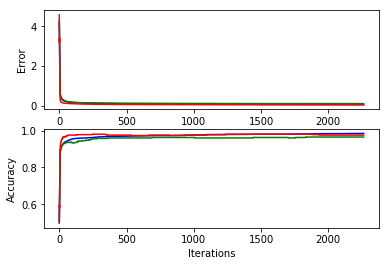

Regularization =  0.01 Learning Rate =  0.001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  787
Stopping iteration =  1094
Final train classification accuracy =  0.9872364039955605
Final validation classification accuracy =  0.9675810473815462
Final test classification accuracy =  0.9755501222493888


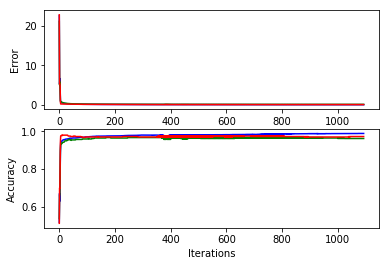

Regularization =  0.01 Learning Rate =  0.0001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  4651
Stopping iteration =  4654
Final train classification accuracy =  0.9811320754716981
Final validation classification accuracy =  0.9600997506234414
Final test classification accuracy =  0.9779951100244498


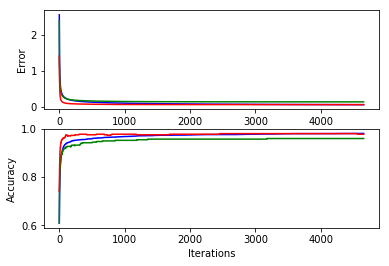

Regularization =  0.01 Learning Rate =  0.0003   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  3530
Stopping iteration =  3533
Final train classification accuracy =  0.9891786903440621
Final validation classification accuracy =  0.9675810473815462
Final test classification accuracy =  0.9779951100244498


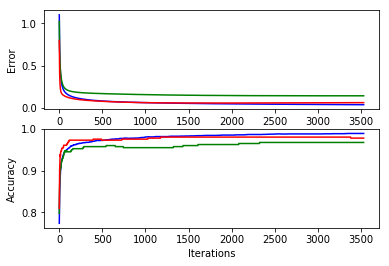

Regularization =  0.001 Learning Rate =  0.001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  686
Stopping iteration =  1019
Final train classification accuracy =  0.983906770255272
Final validation classification accuracy =  0.9750623441396509
Final test classification accuracy =  0.980440097799511


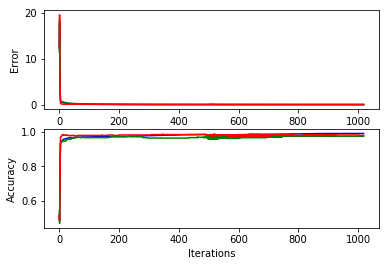

Regularization =  0.001 Learning Rate =  0.0001   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  4999
Stopping iteration =  1
Final train classification accuracy =  0.9822419533851277
Final validation classification accuracy =  0.9675810473815462
Final test classification accuracy =  0.9633251833740831


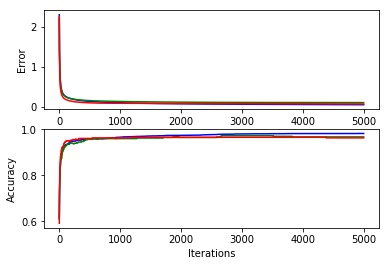

Regularization =  0.001 Learning Rate =  0.0003   with L2 = False
Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration of min weights =  2753
Stopping iteration =  2756
Final train classification accuracy =  0.9872364039955605
Final validation classification accuracy =  0.9675810473815462
Final test classification accuracy =  0.9779951100244498


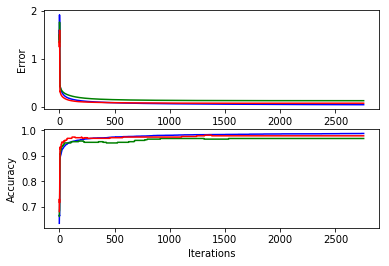

In [73]:
for reg in [0.1, 0.01, 0.001]:
    for learning_rate in [0.001, 0.0001, 0.0003]:
        print("Regularization = ", reg, "Learning Rate = ", learning_rate, "  with L2 = True")
        gradientDescent(x, t, learning_rate, reg, 10000, True)
    
for reg in [0.1, 0.01, 0.001]:
    for learning_rate in [0.001, 0.0001, 0.0003]:
        print("Regularization = ", reg, "Learning Rate = ", learning_rate, "  with L2 = False")
        gradientDescent(x, t, learning_rate, reg, 10000, False)

Shapes:
(3604, 785)
(401, 785)
(409, 785)
(3604,)
(401,)
(409,)
Iteration =  0
Current validation error =  1.7173942095293164
Iteration =  1
Current validation error =  1.4913813459238585
Iteration =  2
Current validation error =  1.3228763148399838
Iteration =  3
Current validation error =  1.1941151878618126
Iteration =  4
Current validation error =  1.0930536699913234
Iteration =  5
Current validation error =  1.0116048231088832
Iteration =  6
Current validation error =  0.9444359697334336
Iteration =  7
Current validation error =  0.8880098001245594
Iteration =  8
Current validation error =  0.8399304666451005
Iteration =  9
Current validation error =  0.7985061357471055
Iteration =  10
Current validation error =  0.762470105250809
Iteration =  11
Current validation error =  0.7308330748375725
Iteration =  12
Current validation error =  0.7028164027654883
Iteration =  13
Current validation error =  0.6778127256090093
Iteration =  14
Current validation error =  0.6553498366133634
It

Current validation error =  0.27837203280164025
Iteration =  129
Current validation error =  0.2777243072816701
Iteration =  130
Current validation error =  0.27708431869880434
Iteration =  131
Current validation error =  0.2764518976716014
Iteration =  132
Current validation error =  0.27582687964930724
Iteration =  133
Current validation error =  0.27520910496117695
Iteration =  134
Current validation error =  0.27459841774341553
Iteration =  135
Current validation error =  0.2739946673560562
Iteration =  136
Current validation error =  0.2733977064201738
Iteration =  137
Current validation error =  0.27280739224565864
Iteration =  138
Current validation error =  0.2722235860079406
Iteration =  139
Current validation error =  0.271646152159063
Iteration =  140
Current validation error =  0.27107495964015116
Iteration =  141
Current validation error =  0.27050988040330864
Iteration =  142
Current validation error =  0.2699507897372206
Iteration =  143
Current validation error =  0.269

Current validation error =  0.2281386205722265
Iteration =  258
Current validation error =  0.2278899865459354
Iteration =  259
Current validation error =  0.2276425986257291
Iteration =  260
Current validation error =  0.22739644640193193
Iteration =  261
Current validation error =  0.2271515197993996
Iteration =  262
Current validation error =  0.2269078085667467
Iteration =  263
Current validation error =  0.22666530288038464
Iteration =  264
Current validation error =  0.2264239927398827
Iteration =  265
Current validation error =  0.22618386865964632
Iteration =  266
Current validation error =  0.22594492087708473
Iteration =  267
Current validation error =  0.22570714003708953
Iteration =  268
Current validation error =  0.22547051679748964
Iteration =  269
Current validation error =  0.22523504192502647
Iteration =  270
Current validation error =  0.22500070648008175
Iteration =  271
Current validation error =  0.22476750125060063
Iteration =  272
Current validation error =  0.2

Current validation error =  0.20375796212891137
Iteration =  387
Current validation error =  0.20361442931060258
Iteration =  388
Current validation error =  0.2034714212433255
Iteration =  389
Current validation error =  0.20332893493904994
Iteration =  390
Current validation error =  0.20318696731741492
Iteration =  391
Current validation error =  0.2030455154730188
Iteration =  392
Current validation error =  0.2029045764079608
Iteration =  393
Current validation error =  0.20276414718405825
Iteration =  394
Current validation error =  0.20262422484733797
Iteration =  395
Current validation error =  0.2024848065391671
Iteration =  396
Current validation error =  0.20234588938404008
Iteration =  397
Current validation error =  0.20220747041788006
Iteration =  398
Current validation error =  0.20206954691571977
Iteration =  399
Current validation error =  0.2019321159545548
Iteration =  400
Current validation error =  0.20179517474034606
Iteration =  401
Current validation error =  0.

Current validation error =  0.18888869527819083
Iteration =  514
Current validation error =  0.1887928377476973
Iteration =  515
Current validation error =  0.1886972385672357
Iteration =  516
Current validation error =  0.18860189639993513
Iteration =  517
Current validation error =  0.18850680987111065
Iteration =  518
Current validation error =  0.18841197765380177
Iteration =  519
Current validation error =  0.18831739841177716
Iteration =  520
Current validation error =  0.18822307081853704
Iteration =  521
Current validation error =  0.1881289935572429
Iteration =  522
Current validation error =  0.18803516532067813
Iteration =  523
Current validation error =  0.1879415848295196
Iteration =  524
Current validation error =  0.18784825075887082
Iteration =  525
Current validation error =  0.18775516184846597
Iteration =  526
Current validation error =  0.18766231681094714
Iteration =  527
Current validation error =  0.1875697144316284
Iteration =  528
Current validation error =  0.

Current validation error =  0.17826928717069127
Iteration =  643
Current validation error =  0.17819823975097554
Iteration =  644
Current validation error =  0.17812733533521757
Iteration =  645
Current validation error =  0.17805657335752817
Iteration =  646
Current validation error =  0.17798595329461622
Iteration =  647
Current validation error =  0.1779154746159226
Iteration =  648
Current validation error =  0.17784513678379793
Iteration =  649
Current validation error =  0.1777749392807222
Iteration =  650
Current validation error =  0.17770488156582198
Iteration =  651
Current validation error =  0.17763496312905816
Iteration =  652
Current validation error =  0.177565183458562
Iteration =  653
Current validation error =  0.17749554202471465
Iteration =  654
Current validation error =  0.17742603833360807
Iteration =  655
Current validation error =  0.17735667187879156
Iteration =  656
Current validation error =  0.17728744215207182
Iteration =  657
Current validation error =  0

Current validation error =  0.17012825145731167
Iteration =  772
Current validation error =  0.17007216581000753
Iteration =  773
Current validation error =  0.17001617459617974
Iteration =  774
Current validation error =  0.16996027755282045
Iteration =  775
Current validation error =  0.16990447442482276
Iteration =  776
Current validation error =  0.16984876494071627
Iteration =  777
Current validation error =  0.1697931488473192
Iteration =  778
Current validation error =  0.16973762588546612
Iteration =  779
Current validation error =  0.16968219578670024
Iteration =  780
Current validation error =  0.1696268583040687
Iteration =  781
Current validation error =  0.16957161317106567
Iteration =  782
Current validation error =  0.16951646014592142
Iteration =  783
Current validation error =  0.1694613989606626
Iteration =  784
Current validation error =  0.16940642937191774
Iteration =  785
Current validation error =  0.1693515511170196
Iteration =  786
Current validation error =  0

Current validation error =  0.16368279824082763
Iteration =  899
Current validation error =  0.16363690077271106
Iteration =  900
Current validation error =  0.1635910711876435
Iteration =  901
Current validation error =  0.16354530932196665
Iteration =  902
Current validation error =  0.16349961501480814
Iteration =  903
Current validation error =  0.1634539881034377
Iteration =  904
Current validation error =  0.16340842842330328
Iteration =  905
Current validation error =  0.16336293581263892
Iteration =  906
Current validation error =  0.16331751011015372
Iteration =  907
Current validation error =  0.16327215115275048
Iteration =  908
Current validation error =  0.16322685878917312
Iteration =  909
Current validation error =  0.16318163284816783
Iteration =  910
Current validation error =  0.16313647317938335
Iteration =  911
Current validation error =  0.16309137961933498
Iteration =  912
Current validation error =  0.163046352011785
Iteration =  913
Current validation error =  0

Current validation error =  0.1583092694148354
Iteration =  1027
Current validation error =  0.15827090264309154
Iteration =  1028
Current validation error =  0.15823258676732646
Iteration =  1029
Current validation error =  0.15819432168614142
Iteration =  1030
Current validation error =  0.15815610728875906
Iteration =  1031
Current validation error =  0.15811794347751656
Iteration =  1032
Current validation error =  0.15807983014220572
Iteration =  1033
Current validation error =  0.1580417671824888
Iteration =  1034
Current validation error =  0.1580037544919169
Iteration =  1035
Current validation error =  0.15796579196592583
Iteration =  1036
Current validation error =  0.15792787950338247
Iteration =  1037
Current validation error =  0.15789001700183183
Iteration =  1038
Current validation error =  0.15785220435908096
Iteration =  1039
Current validation error =  0.157814441473203
Iteration =  1040
Current validation error =  0.15777672823941563
Iteration =  1041
Current validat

Current validation error =  0.15381202520534465
Iteration =  1154
Current validation error =  0.15377938144983624
Iteration =  1155
Current validation error =  0.15374677756897126
Iteration =  1156
Current validation error =  0.15371421349401262
Iteration =  1157
Current validation error =  0.15368168915056574
Iteration =  1158
Current validation error =  0.15364920447136318
Iteration =  1159
Current validation error =  0.15361675938234398
Iteration =  1160
Current validation error =  0.15358435381884225
Iteration =  1161
Current validation error =  0.15355198770481612
Iteration =  1162
Current validation error =  0.15351966097588582
Iteration =  1163
Current validation error =  0.15348737355863964
Iteration =  1164
Current validation error =  0.15345512538668948
Iteration =  1165
Current validation error =  0.15342291638922587
Iteration =  1166
Current validation error =  0.1533907465001443
Iteration =  1167
Current validation error =  0.15335861564780512
Iteration =  1168
Current val

Current validation error =  0.14996360604553827
Iteration =  1281
Current validation error =  0.14993551989570933
Iteration =  1282
Current validation error =  0.14990746601199842
Iteration =  1283
Current validation error =  0.14987944434421802
Iteration =  1284
Current validation error =  0.14985145484314805
Iteration =  1285
Current validation error =  0.1498234974553152
Iteration =  1286
Current validation error =  0.1497955721325722
Iteration =  1287
Current validation error =  0.1497676788251245
Iteration =  1288
Current validation error =  0.14973981748327364
Iteration =  1289
Current validation error =  0.1497119880548313
Iteration =  1290
Current validation error =  0.1496841904920298
Iteration =  1291
Current validation error =  0.14965642474631985
Iteration =  1292
Current validation error =  0.1496286907649663
Iteration =  1293
Current validation error =  0.14960098850048023
Iteration =  1294
Current validation error =  0.14957331790374978
Iteration =  1295
Current validati

Current validation error =  0.14663911132407026
Iteration =  1408
Current validation error =  0.14661475440110072
Iteration =  1409
Current validation error =  0.14659042415343004
Iteration =  1410
Current validation error =  0.1465661205433159
Iteration =  1411
Current validation error =  0.14654184353444108
Iteration =  1412
Current validation error =  0.14651759308648968
Iteration =  1413
Current validation error =  0.1464933691619409
Iteration =  1414
Current validation error =  0.14646917172334376
Iteration =  1415
Current validation error =  0.14644500073197106
Iteration =  1416
Current validation error =  0.14642085615119207
Iteration =  1417
Current validation error =  0.14639673794176095
Iteration =  1418
Current validation error =  0.14637264606652312
Iteration =  1419
Current validation error =  0.14634858048839566
Iteration =  1420
Current validation error =  0.14632454116903215
Iteration =  1421
Current validation error =  0.1463005280721621
Iteration =  1422
Current valid

Current validation error =  0.14374717740302492
Iteration =  1535
Current validation error =  0.14372592494541497
Iteration =  1536
Current validation error =  0.1437046948340446
Iteration =  1537
Current validation error =  0.14368348704181697
Iteration =  1538
Current validation error =  0.1436623015362191
Iteration =  1539
Current validation error =  0.14364113828753494
Iteration =  1540
Current validation error =  0.14361999726719787
Iteration =  1541
Current validation error =  0.14359887844288527
Iteration =  1542
Current validation error =  0.14357778178668912
Iteration =  1543
Current validation error =  0.1435567072664179
Iteration =  1544
Current validation error =  0.14353565485319628
Iteration =  1545
Current validation error =  0.14351462451819932
Iteration =  1546
Current validation error =  0.14349361622942758
Iteration =  1547
Current validation error =  0.1434726299592534
Iteration =  1548
Current validation error =  0.1434516656768763
Iteration =  1549
Current validat

Current validation error =  0.14121733078126605
Iteration =  1662
Current validation error =  0.14119869030000998
Iteration =  1663
Current validation error =  0.1411800686988309
Iteration =  1664
Current validation error =  0.14116146595187856
Iteration =  1665
Current validation error =  0.14114288203471226
Iteration =  1666
Current validation error =  0.14112431692339064
Iteration =  1667
Current validation error =  0.14110577059401544
Iteration =  1668
Current validation error =  0.14108724302138653
Iteration =  1669
Current validation error =  0.14106873418125065
Iteration =  1670
Current validation error =  0.14105024404850716
Iteration =  1671
Current validation error =  0.1410317726007918
Iteration =  1672
Current validation error =  0.14101331981130621
Iteration =  1673
Current validation error =  0.1409948856586718
Iteration =  1674
Current validation error =  0.1409764701161907
Iteration =  1675
Current validation error =  0.14095807316078657
Iteration =  1676
Current valida

Current validation error =  0.13900968147804205
Iteration =  1788
Current validation error =  0.1389932383164648
Iteration =  1789
Current validation error =  0.1389768112231293
Iteration =  1790
Current validation error =  0.13896040017801894
Iteration =  1791
Current validation error =  0.1389440051603873
Iteration =  1792
Current validation error =  0.1389276261506766
Iteration =  1793
Current validation error =  0.1389112631285986
Iteration =  1794
Current validation error =  0.13889491607351953
Iteration =  1795
Current validation error =  0.13887858496713487
Iteration =  1796
Current validation error =  0.1388622697873563
Iteration =  1797
Current validation error =  0.13884597051519
Iteration =  1798
Current validation error =  0.13882968713091057
Iteration =  1799
Current validation error =  0.13881341961406832
Iteration =  1800
Current validation error =  0.1387971679453929
Iteration =  1801
Current validation error =  0.1387809321048866
Iteration =  1802
Current validation er

Current validation error =  0.13704353531540875
Iteration =  1915
Current validation error =  0.13702898099910948
Iteration =  1916
Current validation error =  0.13701444041570815
Iteration =  1917
Current validation error =  0.13699991354922875
Iteration =  1918
Current validation error =  0.1369854003830586
Iteration =  1919
Current validation error =  0.13697090089994893
Iteration =  1920
Current validation error =  0.13695641508400763
Iteration =  1921
Current validation error =  0.13694194291870138
Iteration =  1922
Current validation error =  0.1369274843862096
Iteration =  1923
Current validation error =  0.1369130394720394
Iteration =  1924
Current validation error =  0.1368986081577647
Iteration =  1925
Current validation error =  0.13688419042828504
Iteration =  1926
Current validation error =  0.13686978626688
Iteration =  1927
Current validation error =  0.13685539565619875
Iteration =  1928
Current validation error =  0.13684101858121994
Iteration =  1929
Current validatio

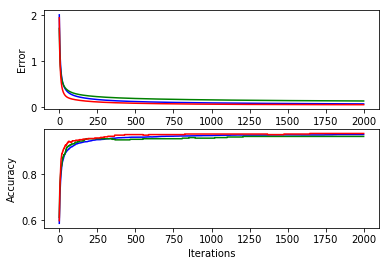

In [55]:
x = [images_train, images_validation, images_test]
t = [labels_train, labels_validation, labels_test]
gradientDescent(x, t, 0.0001, 0.0, 10000, False)

Text(0.5,0,'Iterations')

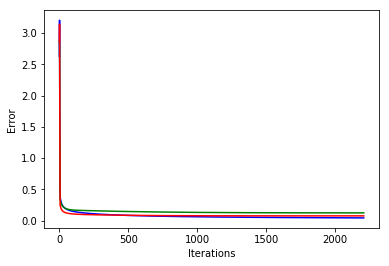

In [17]:
import matplotlib.pyplot as plt

plt.plot(arrTrainingError, label='Train', color='blue')
plt.plot(arrValidationError, label='Validation', color='green')
plt.plot(arrTestError, label='Test', color='red')
plt.ylabel('Error')
plt.xlabel('Iterations')

Text(0.5,0,'Iterations')

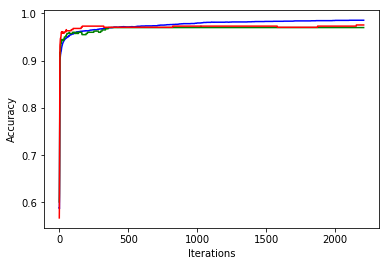

In [18]:
import matplotlib.pyplot as plt

plt.plot(arrTrainClassificationAccuracy, label='Train', color='blue')
plt.plot(arrValidationClassificationAccuracy, label='Validation', color='green')
plt.plot(arrTestClassificationAccuracy, label='Test', color='red')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')

In [49]:
# 2 vs 8

images_train_8 = []
images_test_8 = []
labels_train_8 = []
labels_test_8 = []

for i in range(len(labels_train_all)):
    if (labels_train_all[i] == 2):
        images_train_8.append(images_train_all[i])
        labels_train_8.append(1)
    if (labels_train_all[i] == 8):
        images_train_8.append(images_train_all[i])
        labels_train_8.append(0)
        
for i in range(len(labels_test_all)):
    if (labels_test_all[i] == 2):
        images_test_8.append(images_test_all[i])
        labels_test_8.append(1)
    if (labels_test_all[i] == 8):
        images_test_8.append(images_test_all[i])
        labels_test_8.append(0)

images_train_8 = np.array(images_train_8)
labels_train_8 = np.array(labels_train_8)
images_test_8 = np.array(images_test_8)
labels_test_8 = np.array(labels_test_8)

images_train_8 = images_train_8*(1/255)
images_test_8 = images_test_8*(1/255)

images_train_8, images_validation_8, labels_train_8, labels_validation_8 = train_test_split(images_train_8, labels_train_8, test_size=0.10)


Shapes:
(3465, 785)
(386, 785)
(390, 785)
(3465,)
(386,)
(390,)
Iteration =  0
Current validation error =  3.227938254313919
Iteration =  1
Current validation error =  2.7968666868363887
Iteration =  2
Current validation error =  2.4331280491697633
Iteration =  3
Current validation error =  2.1320752351585672
Iteration =  4
Current validation error =  1.8854258656418597
Iteration =  5
Current validation error =  1.6835682115344324
Iteration =  6
Current validation error =  1.5170016448559802
Iteration =  7
Current validation error =  1.3779134578045478
Iteration =  8
Current validation error =  1.2608250073695775
Iteration =  9
Current validation error =  1.1617210485586256
Iteration =  10
Current validation error =  1.077321287158863
Iteration =  11
Current validation error =  1.004892211722472
Iteration =  12
Current validation error =  0.9422240363459647
Iteration =  13
Current validation error =  0.8875791194290651
Iteration =  14
Current validation error =  0.8395850814209206
Iter

Current validation error =  0.2253572224950882
Iteration =  129
Current validation error =  0.22471957306254486
Iteration =  130
Current validation error =  0.2240918785026332
Iteration =  131
Current validation error =  0.22347391563821783
Iteration =  132
Current validation error =  0.22286546709122979
Iteration =  133
Current validation error =  0.22226632108155708
Iteration =  134
Current validation error =  0.22167627123783815
Iteration =  135
Current validation error =  0.22109511641934154
Iteration =  136
Current validation error =  0.22052266054814432
Iteration =  137
Current validation error =  0.21995871245087495
Iteration =  138
Current validation error =  0.21940308570932987
Iteration =  139
Current validation error =  0.2188555985193033
Iteration =  140
Current validation error =  0.21831607355701996
Iteration =  141
Current validation error =  0.21778433785258974
Iteration =  142
Current validation error =  0.2172602226699429
Iteration =  143
Current validation error =  0

Current validation error =  0.18395193653523204
Iteration =  257
Current validation error =  0.1837845860878088
Iteration =  258
Current validation error =  0.18361847273970958
Iteration =  259
Current validation error =  0.1834535840278593
Iteration =  260
Current validation error =  0.18328990766696787
Iteration =  261
Current validation error =  0.18312743154533717
Iteration =  262
Current validation error =  0.18296614372080475
Iteration =  263
Current validation error =  0.18280603241681392
Iteration =  264
Current validation error =  0.1826470860186129
Iteration =  265
Current validation error =  0.18248929306957332
Iteration =  266
Current validation error =  0.18233264226762597
Iteration =  267
Current validation error =  0.18217712246181178
Iteration =  268
Current validation error =  0.18202272264893612
Iteration =  269
Current validation error =  0.18186943197033673
Iteration =  270
Current validation error =  0.1817172397087471
Iteration =  271
Current validation error =  0

Current validation error =  0.1695651406866073
Iteration =  385
Current validation error =  0.16949102881375144
Iteration =  386
Current validation error =  0.16941731141965075
Iteration =  387
Current validation error =  0.16934398523988248
Iteration =  388
Current validation error =  0.1692710470409294
Iteration =  389
Current validation error =  0.1691984936199158
Iteration =  390
Current validation error =  0.16912632180434703
Iteration =  391
Current validation error =  0.16905452845185323
Iteration =  392
Current validation error =  0.16898311044993336
Iteration =  393
Current validation error =  0.16891206471570214
Iteration =  394
Current validation error =  0.16884138819563924
Iteration =  395
Current validation error =  0.16877107786534135
Iteration =  396
Current validation error =  0.16870113072927442
Iteration =  397
Current validation error =  0.16863154382053203
Iteration =  398
Current validation error =  0.16856231420058992
Iteration =  399
Current validation error =  

Current validation error =  0.16244036927073083
Iteration =  513
Current validation error =  0.1623984037968275
Iteration =  514
Current validation error =  0.16235659315492904
Iteration =  515
Current validation error =  0.16231493639806024
Iteration =  516
Current validation error =  0.16227343258738605
Iteration =  517
Current validation error =  0.16223208079210652
Iteration =  518
Current validation error =  0.1621908800893539
Iteration =  519
Current validation error =  0.16214982956408777
Iteration =  520
Current validation error =  0.1621089283089944
Iteration =  521
Current validation error =  0.1620681754243858
Iteration =  522
Current validation error =  0.16202757001810061
Iteration =  523
Current validation error =  0.1619871112054044
Iteration =  524
Current validation error =  0.16194679810889487
Iteration =  525
Current validation error =  0.16190662985840412
Iteration =  526
Current validation error =  0.1618666055909053
Iteration =  527
Current validation error =  0.1

Current validation error =  0.15801326570304428
Iteration =  643
Current validation error =  0.15798551503770014
Iteration =  644
Current validation error =  0.15795783864532656
Iteration =  645
Current validation error =  0.15793023611260482
Iteration =  646
Current validation error =  0.1579027070283208
Iteration =  647
Current validation error =  0.157875250983352
Iteration =  648
Current validation error =  0.15784786757065772
Iteration =  649
Current validation error =  0.15782055638527143
Iteration =  650
Current validation error =  0.15779331702428848
Iteration =  651
Current validation error =  0.15776614908685968
Iteration =  652
Current validation error =  0.15773905217417947
Iteration =  653
Current validation error =  0.15771202588947994
Iteration =  654
Current validation error =  0.15768506983801975
Iteration =  655
Current validation error =  0.15765818362707595
Iteration =  656
Current validation error =  0.15763136686593787
Iteration =  657
Current validation error =  

Current validation error =  0.15492335166300253
Iteration =  772
Current validation error =  0.1549024299288502
Iteration =  773
Current validation error =  0.1548815442844607
Iteration =  774
Current validation error =  0.15486069453939158
Iteration =  775
Current validation error =  0.1548398805046135
Iteration =  776
Current validation error =  0.1548191019925025
Iteration =  777
Current validation error =  0.15479835881683623
Iteration =  778
Current validation error =  0.154777650792788
Iteration =  779
Current validation error =  0.15475697773692043
Iteration =  780
Current validation error =  0.15473633946718018
Iteration =  781
Current validation error =  0.15471573580289225
Iteration =  782
Current validation error =  0.15469516656475393
Iteration =  783
Current validation error =  0.1546746315748285
Iteration =  784
Current validation error =  0.1546541306565419
Iteration =  785
Current validation error =  0.15463366363467254
Iteration =  786
Current validation error =  0.154

Current validation error =  0.15246972733995806
Iteration =  901
Current validation error =  0.15245231526388583
Iteration =  902
Current validation error =  0.15243492421507362
Iteration =  903
Current validation error =  0.15241755413393582
Iteration =  904
Current validation error =  0.1524002049615038
Iteration =  905
Current validation error =  0.15238287663941769
Iteration =  906
Current validation error =  0.15236556910992377
Iteration =  907
Current validation error =  0.15234828231586853
Iteration =  908
Current validation error =  0.15233101620069198
Iteration =  909
Current validation error =  0.15231377070842467
Iteration =  910
Current validation error =  0.15229654578368013
Iteration =  911
Current validation error =  0.15227934137165058
Iteration =  912
Current validation error =  0.15226215741810273
Iteration =  913
Current validation error =  0.15224499386937224
Iteration =  914
Current validation error =  0.15222785067235578
Iteration =  915
Current validation error =

Current validation error =  0.15039685919518056
Iteration =  1029
Current validation error =  0.1503818150779334
Iteration =  1030
Current validation error =  0.15036678784979826
Iteration =  1031
Current validation error =  0.1503517774964589
Iteration =  1032
Current validation error =  0.15033678400376158
Iteration =  1033
Current validation error =  0.15032180735771583
Iteration =  1034
Current validation error =  0.15030684754449194
Iteration =  1035
Current validation error =  0.1502919045504179
Iteration =  1036
Current validation error =  0.1502769783619793
Iteration =  1037
Current validation error =  0.15026206896581568
Iteration =  1038
Current validation error =  0.15024717634871987
Iteration =  1039
Current validation error =  0.15023230049763658
Iteration =  1040
Current validation error =  0.15021744139965862
Iteration =  1041
Current validation error =  0.15020259904202737
Iteration =  1042
Current validation error =  0.15018777341213063
Iteration =  1043
Current valida

Current validation error =  0.14863089456852766
Iteration =  1155
Current validation error =  0.14861790369628924
Iteration =  1156
Current validation error =  0.14860492872334777
Iteration =  1157
Current validation error =  0.14859196964539345
Iteration =  1158
Current validation error =  0.1485790264581346
Iteration =  1159
Current validation error =  0.14856609915729732
Iteration =  1160
Current validation error =  0.14855318773862541
Iteration =  1161
Current validation error =  0.14854029219787837
Iteration =  1162
Current validation error =  0.14852741253083226
Iteration =  1163
Current validation error =  0.1485145487332776
Iteration =  1164
Current validation error =  0.14850170080101985
Iteration =  1165
Current validation error =  0.1484888687298782
Iteration =  1166
Current validation error =  0.14847605251568471
Iteration =  1167
Current validation error =  0.14846325215428446
Iteration =  1168
Current validation error =  0.1484504676415333
Iteration =  1169
Current valida

Current validation error =  0.1471289233581805
Iteration =  1280
Current validation error =  0.14711788667545586
Iteration =  1281
Current validation error =  0.1471068653170256
Iteration =  1282
Current validation error =  0.14709585927679747
Iteration =  1283
Current validation error =  0.1470848685486405
Iteration =  1284
Current validation error =  0.14707389312638552
Iteration =  1285
Current validation error =  0.14706293300382337
Iteration =  1286
Current validation error =  0.1470519881747063
Iteration =  1287
Current validation error =  0.14704105863274755
Iteration =  1288
Current validation error =  0.14703014437161904
Iteration =  1289
Current validation error =  0.1470192453849544
Iteration =  1290
Current validation error =  0.1470083616663451
Iteration =  1291
Current validation error =  0.1469974932093444
Iteration =  1292
Current validation error =  0.1469866400074637
Iteration =  1293
Current validation error =  0.14697580205417335
Iteration =  1294
Current validation

Current validation error =  0.14586574862353224
Iteration =  1405
Current validation error =  0.14585656634843122
Iteration =  1406
Current validation error =  0.14584739828868062
Iteration =  1407
Current validation error =  0.14583824443241802
Iteration =  1408
Current validation error =  0.14582910476773456
Iteration =  1409
Current validation error =  0.14581997928267518
Iteration =  1410
Current validation error =  0.14581086796523832
Iteration =  1411
Current validation error =  0.14580177080337514
Iteration =  1412
Current validation error =  0.14579268778499213
Iteration =  1413
Current validation error =  0.14578361889794825
Iteration =  1414
Current validation error =  0.1457745641300579
Iteration =  1415
Current validation error =  0.14576552346908803
Iteration =  1416
Current validation error =  0.1457564969027601
Iteration =  1417
Current validation error =  0.14574748441875082
Iteration =  1418
Current validation error =  0.14573848600469078
Iteration =  1419
Current vali

Current validation error =  0.14480144722003424
Iteration =  1533
Current validation error =  0.14479397362523921
Iteration =  1534
Current validation error =  0.14478651239770382
Iteration =  1535
Current validation error =  0.1447790635208744
Iteration =  1536
Current validation error =  0.14477162697817275
Iteration =  1537
Current validation error =  0.14476420275299726
Iteration =  1538
Current validation error =  0.14475679082872356
Iteration =  1539
Current validation error =  0.14474939118870297
Iteration =  1540
Current validation error =  0.14474200381626487
Iteration =  1541
Current validation error =  0.1447346286947156
Iteration =  1542
Current validation error =  0.14472726580733886
Iteration =  1543
Current validation error =  0.14471991513739688
Iteration =  1544
Current validation error =  0.1447125766681289
Iteration =  1545
Current validation error =  0.14470525038275256
Iteration =  1546
Current validation error =  0.14469793626446487
Iteration =  1547
Current valid

Current validation error =  0.14394554262321949
Iteration =  1660
Current validation error =  0.1439395015611246
Iteration =  1661
Current validation error =  0.14393347064629747
Iteration =  1662
Current validation error =  0.1439274498608821
Iteration =  1663
Current validation error =  0.14392143918702274
Iteration =  1664
Current validation error =  0.1439154386068674
Iteration =  1665
Current validation error =  0.14390944810256662
Iteration =  1666
Current validation error =  0.1439034676562734
Iteration =  1667
Current validation error =  0.1438974972501443
Iteration =  1668
Current validation error =  0.14389153686633874
Iteration =  1669
Current validation error =  0.1438855864870201
Iteration =  1670
Current validation error =  0.14387964609435464
Iteration =  1671
Current validation error =  0.14387371567051274
Iteration =  1672
Current validation error =  0.14386779519766935
Iteration =  1673
Current validation error =  0.14386188465800182
Iteration =  1674
Current validati

Current validation error =  0.1432634372212358
Iteration =  1785
Current validation error =  0.1432585284329489
Iteration =  1786
Current validation error =  0.1432536276259873
Iteration =  1787
Current validation error =  0.14324873478389658
Iteration =  1788
Current validation error =  0.14324384989023872
Iteration =  1789
Current validation error =  0.14323897292859555
Iteration =  1790
Current validation error =  0.14323410388256627
Iteration =  1791
Current validation error =  0.14322924273576892
Iteration =  1792
Current validation error =  0.14322438947184038
Iteration =  1793
Current validation error =  0.1432195440744354
Iteration =  1794
Current validation error =  0.14321470652722895
Iteration =  1795
Current validation error =  0.1432098768139128
Iteration =  1796
Current validation error =  0.143205054918199
Iteration =  1797
Current validation error =  0.14320024082381855
Iteration =  1798
Current validation error =  0.143195434514521
Iteration =  1799
Current validation 

Current validation error =  0.14269457975431887
Iteration =  1913
Current validation error =  0.14269056575490624
Iteration =  1914
Current validation error =  0.14268655779992387
Iteration =  1915
Current validation error =  0.14268255587570453
Iteration =  1916
Current validation error =  0.14267855996860415
Iteration =  1917
Current validation error =  0.14267457006500295
Iteration =  1918
Current validation error =  0.14267058615130418
Iteration =  1919
Current validation error =  0.1426666082139366
Iteration =  1920
Current validation error =  0.1426626362393515
Iteration =  1921
Current validation error =  0.14265867021402415
Iteration =  1922
Current validation error =  0.14265471012445444
Iteration =  1923
Current validation error =  0.14265075595716575
Iteration =  1924
Current validation error =  0.14264680769870627
Iteration =  1925
Current validation error =  0.14264286533564638
Iteration =  1926
Current validation error =  0.14263892885458204
Iteration =  1927
Current vali

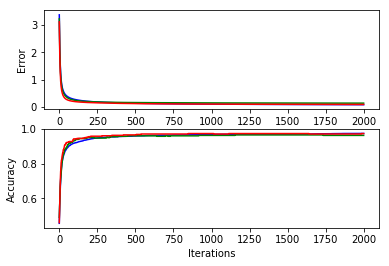

In [50]:
x = [images_train_8, images_validation_8, images_test_8]
t = [labels_train_8, labels_validation_8, labels_test_8]
gradientDescent(x, t, 0.0001, 0.0, 10000, True)

(3604, 785)